In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
#Funcion hash para mapear de una coordenada (x, y) a un numero natural (de forma univoca)
def hashCoordenadaANumero(valorCoordenadaX, valorCoordenadaY, numeroVerticesAncho):
    return valorCoordenadaX * numeroVerticesAncho + valorCoordenadaY

#Funcion hash para mapear de un numero natural a una coordenada (x, y) (de forma univoca)
def hashNumeroACoordenada(numeroIdentificador, numeroVerticesAncho):
    valorCoordenadaX = numeroIdentificador % numeroVerticesAncho
    valorCoordenadaY = int(numeroIdentificador / numeroVerticesAncho)
    return valorCoordenadaX, valorCoordenadaY

def crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo):
    if nodoOrigen not in grafo:
        grafo[nodoOrigen] = {}
    (grafo[nodoOrigen])[nodoDestino] = costo
    if nodoDestino not in grafo:
        grafo[nodoDestino] = {}
    (grafo[nodoDestino])[nodoOrigen] = costo

def obtenerListasCoordendasGrafo(numeroVerticesAlto, numeroVerticesAncho):
    listaValoresCoordenadaX = []
    listaValoresCoordenadaY = []
    for indice1 in range(numeroVerticesAncho):
        for indice2 in range(numeroVerticesAlto):
            listaValoresCoordenadaX.append(indice1)
            listaValoresCoordenadaY.append(indice2)
    return listaValoresCoordenadaX, listaValoresCoordenadaY

def dibujarAristasPlanoCartesiano(grafo, listaNivelesTrafico, listaColoresNivelesTrafico, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo):
    transparencia = 0.9
    numeroNivelesTrafico = len(listaNivelesTrafico)
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen < nodoDestino:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                for indice in range(1, numeroNivelesTrafico + 1):
                    if grafo[nodoOrigen][nodoDestino] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo:
                        plt.plot([valorCoordenadaXNodoOrigen, valorCoordenadaXNodoDestino], [valorCoordenadaYNodoOrigen, valorCoordenadaYNodoDestino], '', c = listaColoresNivelesTrafico[indice - 1], alpha = transparencia)
                        break

In [3]:
numeroVerticesAlto = 20
numeroVerticesAncho = 20
limiteInferiorCostosEntreAristasDelGrafo = 1.0
limiteSuperiorCostosEntreAristasDelGrafo = 2.0

listaNivelesTrafico = ["Poco", "Medio", "Alto"]
listaColoresNivelesTrafico = ["#2ECC71", "#F1C40F", "#E74C3C"]

In [4]:
grafo = {}

#Construccion del grafo en forma de cuadricula para las aristas
for indice1 in range(numeroVerticesAlto):
    for indice2 in range(numeroVerticesAncho - 1):
        nodoOrigen = indice1 * numeroVerticesAncho + indice2
        nodoDestino = indice1 * numeroVerticesAncho + indice2 + 1
        costo = np.round(np.random.uniform(low = limiteInferiorCostosEntreAristasDelGrafo, high = limiteSuperiorCostosEntreAristasDelGrafo), 2)
        crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)
for indice1 in range(numeroVerticesAlto - 1):
    for indice2 in range(numeroVerticesAncho):
        nodoOrigen = indice1 * numeroVerticesAncho + indice2
        nodoDestino = indice1 * numeroVerticesAncho + indice2 + numeroVerticesAncho
        costo = np.round(np.random.uniform(low = limiteInferiorCostosEntreAristasDelGrafo, high = limiteSuperiorCostosEntreAristasDelGrafo), 2)
        crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)

listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY = obtenerListasCoordendasGrafo(numeroVerticesAlto, numeroVerticesAncho)

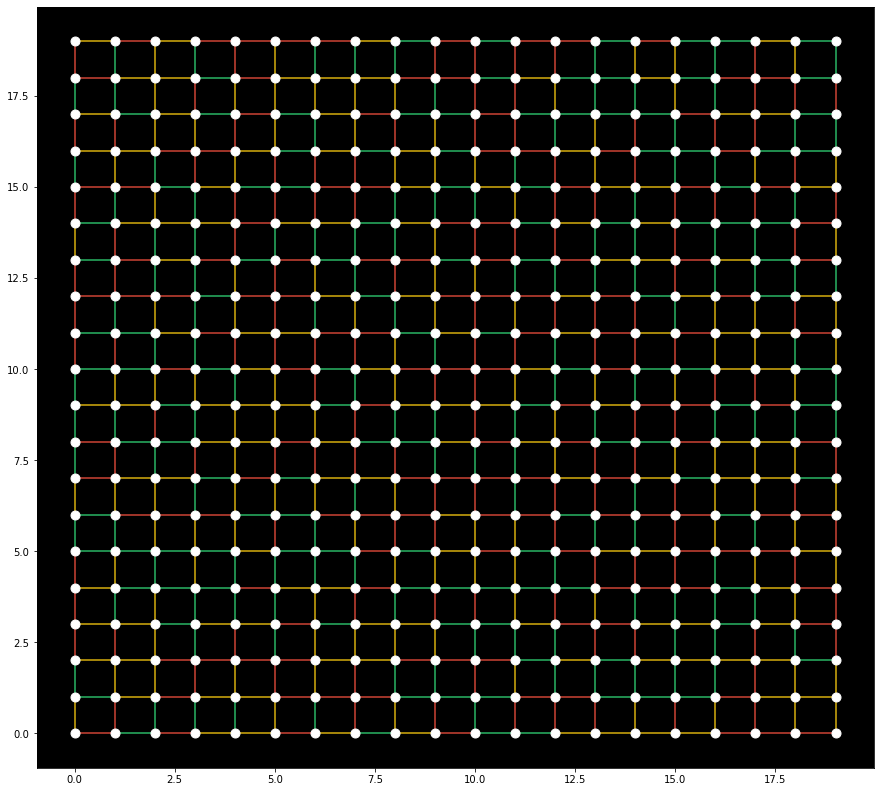

In [5]:
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (15, 14))
dibujarAristasPlanoCartesiano(grafo, listaNivelesTrafico, listaColoresNivelesTrafico, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 18)
plt.show()

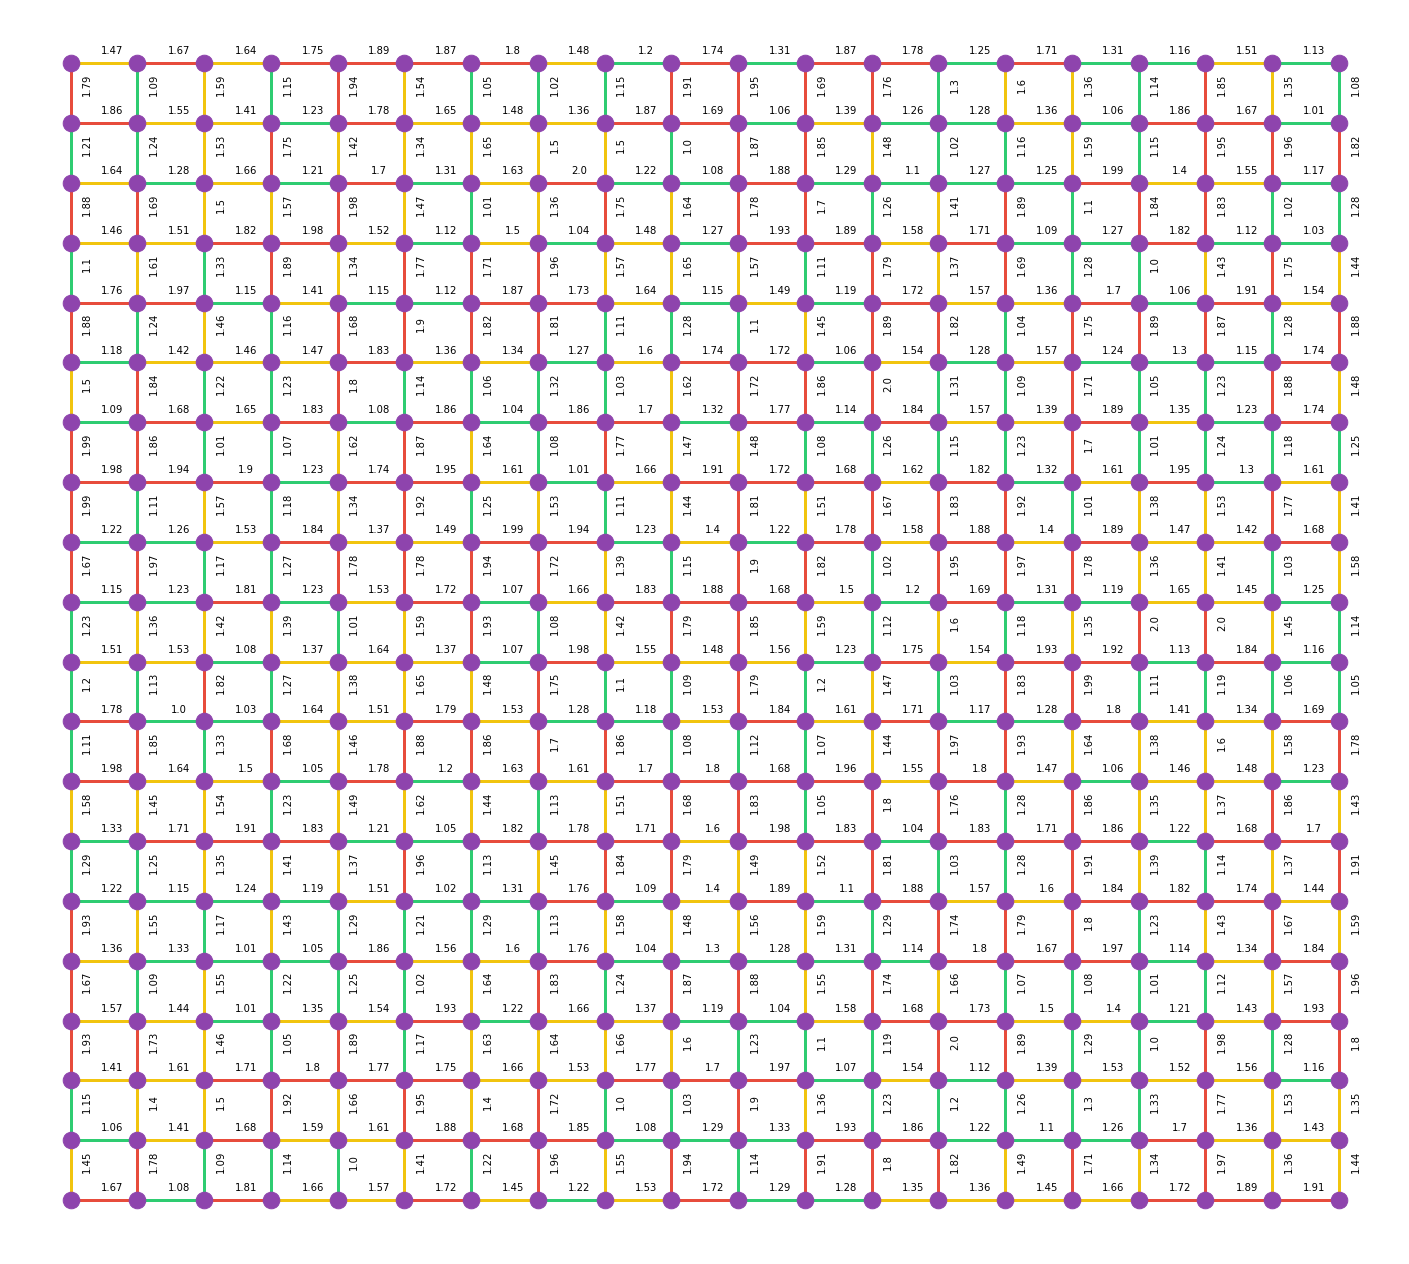

In [6]:
G = nx.Graph()

plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(1, figsize = (25, 23))

fixed_positions = {}
fixed_positions2 = {}
fixed_positions3 = {}
edge1 = {}
edge2 = {}

for nodoOrigen in grafo:
    for nodoDestino in grafo[nodoOrigen]:
        if nodoOrigen < nodoDestino:
            G.add_edge(str(nodoOrigen), str(nodoDestino), weight = grafo[nodoOrigen][nodoDestino])
            if str(nodoOrigen) not in fixed_positions:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                fixed_positions[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen)
            if str(nodoDestino) not in fixed_positions:
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                fixed_positions[str(nodoDestino)] = (valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino)
            if nodoDestino - nodoOrigen == 1:
                edge1[(str(nodoOrigen), str(nodoDestino))] = grafo[nodoOrigen][nodoDestino]
                if str(nodoOrigen) not in fixed_positions2:
                    valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                    fixed_positions2[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen + 0.125, valorCoordenadaYNodoOrigen + 0.21)
                if str(nodoDestino) not in fixed_positions2:
                    valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                    fixed_positions2[str(nodoDestino)] = (valorCoordenadaXNodoDestino + 0.125, valorCoordenadaYNodoDestino + 0.21)
            else:
                edge2[(str(nodoOrigen), str(nodoDestino))] = grafo[nodoOrigen][nodoDestino]
                if str(nodoOrigen) not in fixed_positions3:
                    valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                    fixed_positions3[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen + 0.25, valorCoordenadaYNodoOrigen + 0.15)
                if str(nodoDestino) not in fixed_positions3:
                    valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                    fixed_positions3[str(nodoDestino)] = (valorCoordenadaXNodoDestino + 0.25, valorCoordenadaYNodoDestino + 0.15)
                

ccc = {}
numeroNivelesTrafico = len(listaNivelesTrafico)
for indice in range(1, numeroNivelesTrafico + 1):
    if indice == 1:
        ccc[listaNivelesTrafico[indice - 1]] = [(u, v) for (u, v, d) in G.edges(data = True) if d["weight"] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo]
    else:
        ccc[listaNivelesTrafico[indice - 1]] = [(u, v) for (u, v, d) in G.edges(data = True) if (indice - 1) * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo < d["weight"] and d["weight"] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo]

edgeList1 = [(u, v) for (u, v, d) in G.edges(data = True) if int(v) - int(u) == 1]
        
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, k = 1.0, pos = fixed_positions, fixed = fixed_nodes)
pos2 = nx.spring_layout(G, k = 1.0, pos = fixed_positions2, fixed = fixed_nodes)
pos3 = nx.spring_layout(G, k = 1.0, pos = fixed_positions3, fixed = fixed_nodes)

nx.draw_networkx_nodes(G, pos, node_size = 275, node_color = '#8E44AD')
#nx.draw_networkx_labels(G, pos, font_family = "sans-serif", font_size = 7, font_color = "w")

for indice in range(numeroNivelesTrafico):
    nx.draw_networkx_edges(G, pos, edgelist = ccc[listaNivelesTrafico[indice]], width = 3, edge_color = listaColoresNivelesTrafico[indice])

edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos2, edge_labels)
nx.draw_networkx_edge_labels(G, pos2, edge1)
nx.draw_networkx_edge_labels(G, pos3, edge2)

#ax = plt.gca()
plt.axis("off")
#plt.tight_layout()
plt.show()